In [1]:
#LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#DATALOAD
df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df[['Survived','Age', 'Sex', 'Pclass', 'Fare']]
df

,Survived,Age,Sex,Pclass,Fare
0,0,22.0,male,3,7.2500
1,1,38.0,female,1,71.2833
2,1,26.0,female,3,7.9250
3,1,35.0,female,1,53.1000
4,0,35.0,male,3,8.0500
...,...,...,...,...,...
886,0,27.0,male,2,13.0000
887,1,19.0,female,1,30.0000
888,0,NaN,female,3,23.4500
889,1,26.0,male,1,30.0000


In [4]:
#DATA EXPLORATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Sex       891 non-null    object 
 3   Pclass    891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


The dataset contains 891 entries and 5 variables. The target variable is Survived.
Among predictors, Age has 177 missing values, while Sex is categorical and requires encoding. 
Other variables (Pclass and Fare) are complete. Overall, data cleaning is required before modeling.


In [5]:
df.describe()

,Survived,Age,Pclass,Fare
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,2.308642,32.204208
std,0.486592,14.526497,0.836071,49.693429
min,0.000000,0.420000,1.000000,0.000000
25%,0.000000,20.125000,2.000000,7.910400
50%,0.000000,28.000000,3.000000,14.454200
75%,1.000000,38.000000,3.000000,31.000000
max,1.000000,80.000000,3.000000,512.329200


The dataset summary shows that 38% of passengers survived. 
The average passenger age was 30 years, with some missing values (177).
Most passengers were in 3rd class (median = 3). Ticket fares ranged widely,
with a median of £14.45 and a maximum exceeding £500, indicating high inequality in ticket prices.


In [6]:
#DATA CLEANING
df.isnull().sum()

Survived      0
Age         177
Sex           0
Pclass        0
Fare          0
dtype: int64

The dataset contains missing values only in the Age column (177 out of 891 entries).
All other variables (Survived, Sex, Pclass, Fare) are complete.
Therefore, handling missing values in Age is an essential preprocessing step before modeling.
    

In [9]:
#FILLED AGE MISSING VALUES WITH MEDIAN
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Missing values in the Age column (177) were replaced with the median age (28 years).
Now the column contains 891 complete entries, making it ready for further analysis and modeling.
    

In [10]:
#ENCODE SEX COLUMN
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

The categorical variable Sex was encoded into numeric values using LabelEncoder: male = 1, female = 0.
This makes the column suitable for machine learning models.

In [11]:
#CATEGORIZED PCLASS
df['Pclass'] = df['Pclass'].astype('category')
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

The Pclass variable, representing passenger ticket class (1st, 2nd, 3rd), was converted from integer to categorical type.
This better reflects its nature as an ordinal categorical variable.
    

In [15]:
X = df[['Age', 'Sex', 'Pclass', 'Fare']]
X

,Age,Sex,Pclass,Fare
0,22.0,1,3,7.2500
1,38.0,0,1,71.2833
2,26.0,0,3,7.9250
3,35.0,0,1,53.1000
4,35.0,1,3,8.0500
...,...,...,...,...
886,27.0,1,2,13.0000
887,19.0,0,1,30.0000
888,28.0,0,3,23.4500
889,26.0,1,1,30.0000


The feature matrix X was created using the predictors Age, Sex, Pclass, and Fare.
These variables will be used to train the logistic regression model, while the target variable Survived is stored separately in y.

In [16]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

The target variable y represents passenger survival, where 0 = did not survive and 1 = survived.
It contains 891 entries with no missing values.
    

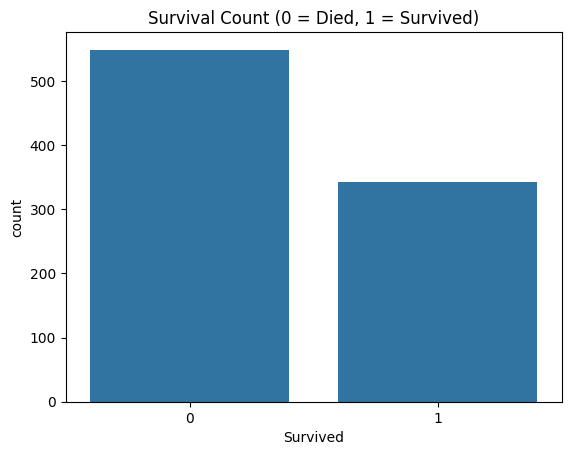

In [18]:
#GRAPHICAL ANALYSIS
#COUNT SURVIVAL
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

The graph indicates that the number of passengers who did not survive(0) was significantly higher than those survived (1). This highlights that survival chances on the titanic were relatively low, with deaths being nearly double the survivors.

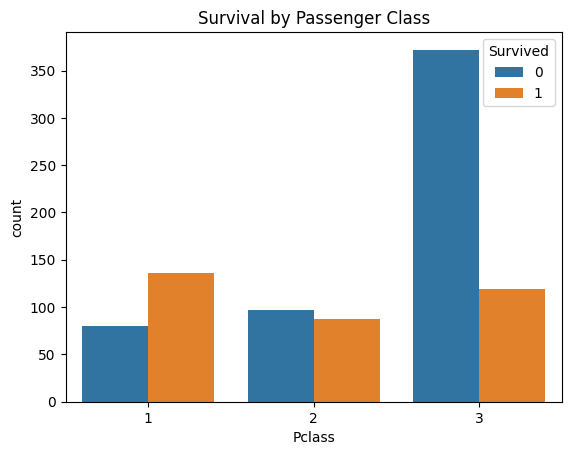

In [19]:
#SURVIVAL BY PASSEGER CLASS
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

passenger class had a strong impact on survival. Higher class passengers (1st class ) were more likely to survive, while most 3rd class passengers did not survive.

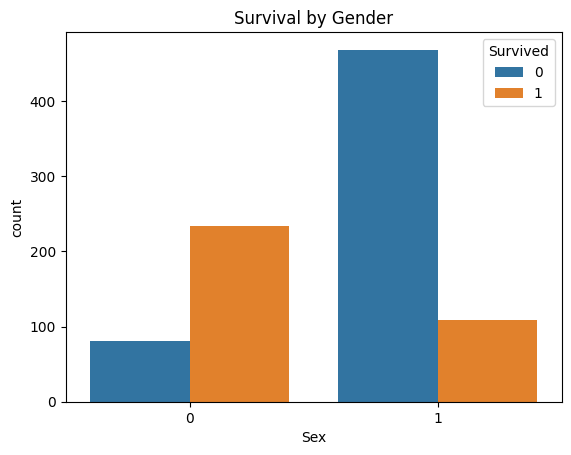

In [20]:
#SURVIVAL BY GENDER
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

The graph shows a clear difference in survival by gender. A significantly higher proportion of females survived compared to males.

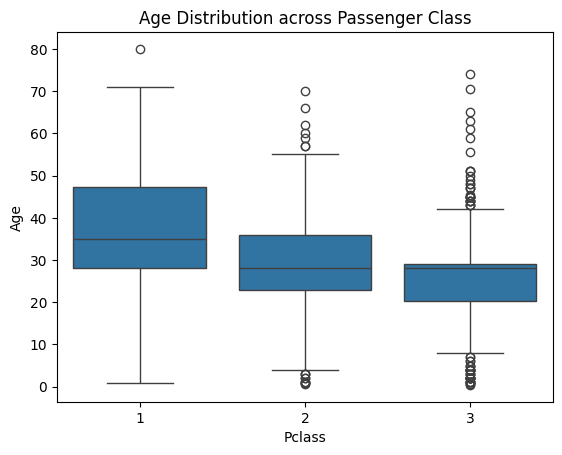

In [21]:
#AGE DISTRIBUTION BY CLASS
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution across Passenger Class")
plt.show()

Higher passengers classes tended to have older passengers.
lower passenger classes specially 3rd class had younger passengers and more children.
outliers exist in all classes but 3rd class shows the most variation in extreme values.

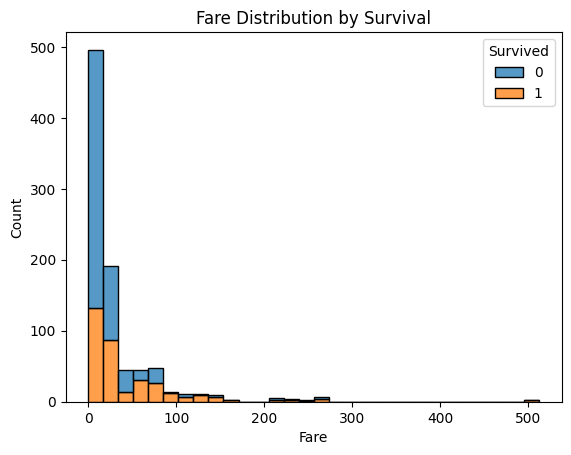

In [22]:
#FARE VS SURVIVAL
sns.histplot(df, x="Fare", hue="Survived", multiple="stack", bins=30)
plt.title("Fare Distribution by Survival")
plt.show()

passengers who paid higher fares had a greater likelihood of survival while most low fare passengers did not survive.

In [ ]:
#TRAIN TEST SPLIT
X = df[['Age', 'Sex', 'Pclass', 'Fare']]   # Independent variables
X
y = df['Survived']                         # Target variable
y

target variable y (Survived).

It has 891 entries, one for each passenger.

Each value is either:

0 → Passenger did not survive

1 → Passenger survived

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test

(      Age  Sex Pclass      Fare
 331  45.5    1      1   28.5000
 733  23.0    1      2   13.0000
 382  32.0    1      3    7.9250
 704  26.0    1      3    7.8542
 813   6.0    0      3   31.2750
 ..    ...  ...    ...       ...
 106  21.0    0      3    7.6500
 270  28.0    1      1   31.0000
 860  41.0    1      3   14.1083
 435  14.0    0      1  120.0000
 102  21.0    1      1   77.2875
 
 [712 rows x 4 columns],
       Age  Sex Pclass     Fare
 709  28.0    1      3  15.2458
 439  31.0    1      2  10.5000
 840  20.0    1      3   7.9250
 720   6.0    0      2  33.0000
 39   14.0    0      3  11.2417
 ..    ...  ...    ...      ...
 433  17.0    1      3   7.1250
 773  28.0    1      3   7.2250
 25   38.0    0      3  31.3875
 84   17.0    0      2  10.5000
 10    4.0    0      3  16.7000
 
 [179 rows x 4 columns],
 331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64,
 709    1
 4

The dataset was split into 80% training data (712 passengers) and 20% testing data (179 passengers), where the training set is used to build the survival prediction model and the testing set is used to evaluate its performance on unseen passengers.

In [27]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# Model initialize & train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


trained a logistic regression model using Age, Sex, Pclass, and Fare as predictors of survival.

Used L2 regularization to prevent overfitting.

Solver = lbfgs, efficient for medium datasets.

Increased max_iter=1000 to ensure convergence.

This confirms that the model is properly trained and ready for evaluation with accuracy, confusion matrix, and feature importance.



In [28]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1])

The output is an array of 0s and 1s.

Each value represents the predicted survival outcome for a passenger in the test set:

0 = Did not survive

1 = Survived

In [29]:
#MODEL EVALUATION
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8044692737430168


Accuracy = 0.804 (≈ 80.4%)

This means the logistic regression model correctly predicted the survival outcome for about 80% of the passengers in the test set.

In [30]:
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



The Logistic Regression model achieved 80% accuracy in predicting Titanic passenger survival. It performed slightly better at identifying non-survivors (recall = 86%) than survivors (recall = 73%), but overall showed a balanced and reliable performance.

In [31]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



The logistic regression model achieved 80% accuracy.

It predicts non-survivors more accurately (86% recall) than survivors (73% recall).

Overall, the model shows a good balance, with precision and recall around 0.8 for both classes.

In [32]:
#FEATURE IMPORTANCE
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
coeff_df

,Feature,Coefficient
0,Age,-0.025163
1,Sex,-2.465606
2,Pclass,-0.996326
3,Fare,0.001183


Age (-0.025) → Older passengers had a slightly lower chance of survival.

Sex (-2.466) → Being male strongly reduced survival chances (negative impact).

Pclass (-0.996) → Higher passenger class number (3rd class) reduced survival likelihood.

Fare (+0.001) → Higher fare paid slightly increased survival chances.
Gender and passenger class were the most influential factors in survival, while age and fare had weaker effects.